<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/winequalitywhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the file path by removing the trailing slash
data = pd.read_csv("/content/sample_data/winequalitywhite.csv", delimiter=",")

In [ ]:
data.shape

(4898, 12)

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Features and target
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predictions and Metrics
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE", mean_squared_error(y_test, y_pred_lr))

Linear Regression R²: 0.2652750042119667
Linear Regression MSE 0.5690247717275326


Linear Regression R²: 0.2652750042119667
Linear Regression MSE: 0.5690247717275326


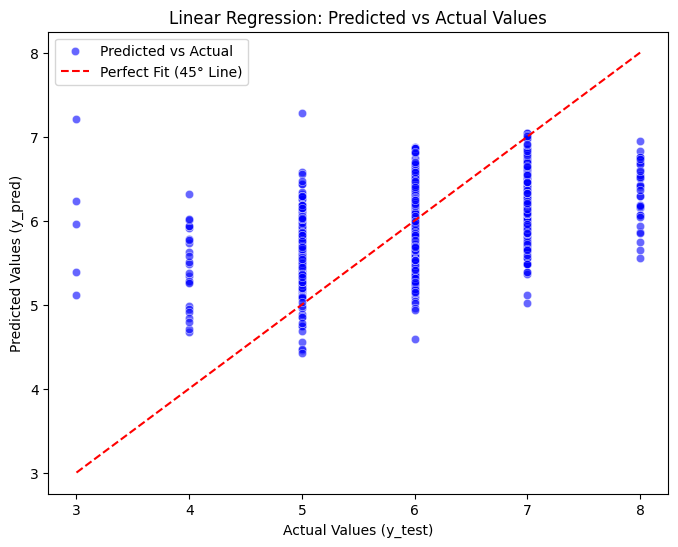

Text(0, 0.5, 'Residuals (y_test - y_pred)')

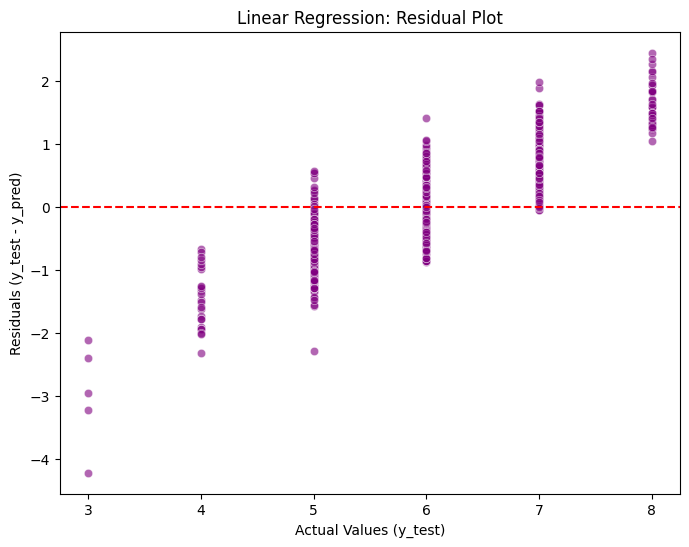

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression R²:", r2)
print("Linear Regression MSE:", mse)

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (45° Line)")
plt.title("Linear Regression: Predicted vs Actual Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.legend()
plt.show()

# Plot 2: Residual Plot
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color="purple", alpha=0.6)
plt.axhline(0, color='r', linestyle='--', label="Zero Residual Line")
plt.title("Linear Regression: Residual Plot")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals (y_test - y_pred)")


In [ ]:
# Experiment with n_estimators
for n in [50, 100, 200]:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print(f"n_estimators {n} - R²: {r2_score(y_test, y_pred_rf)} , MSE{mean_squared_error(y_test, y_pred_rf)}")


n_estimators 50 - R²: 0.5474484998736227 , MSE0.3504889795918367
n_estimators 100 - R²: 0.5509775612930288 , MSE0.34775581632653063
n_estimators 200 - R²: 0.5540549002156483 , MSE0.34537249999999997


In [ ]:
# Experiment with max_depth
for depth in [10, 20, 30]:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print(f"max_depth {depth} - R²: {r2_score(y_test, y_pred_rf)}, MSE{mean_squared_error(y_test, y_pred_rf)}")

max_depth 10 - R²: 0.4676045806664014, MSE0.4123259501062141
max_depth 20 - R²: 0.5470636642718598, MSE0.3507870244272528
max_depth 30 - R²: 0.5508232723644639, MSE0.34787530895691615


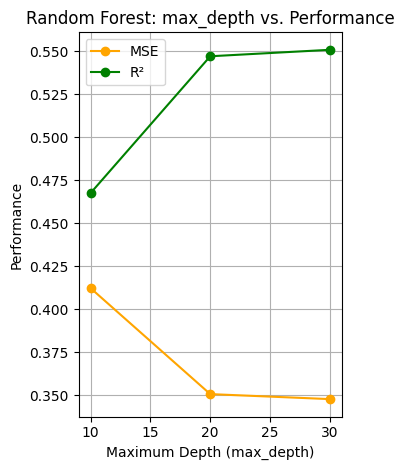

In [ ]:
# Plot Random Forest max_depth
plt.subplot(1, 2, 2)
plt.plot(rf_results["max_depth"]["values"], rf_results["max_depth"]["MSE"], marker='o', label='MSE', color='orange')
plt.plot(rf_results["max_depth"]["values"], rf_results["max_depth"]["R2"], marker='o', label='R²', color='green')
plt.title("Random Forest: max_depth vs. Performance")
plt.xlabel("Maximum Depth (max_depth)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

n_estimators 50 - MAE: 0.42, R²: 0.5474484998736227, MSE: 0.3504889795918367
n_estimators 100 - MAE: 0.4185204081632653, R²: 0.5509775612930288, MSE: 0.34775581632653063
n_estimators 200 - MAE: 0.4172142857142857, R²: 0.5540549002156483, MSE: 0.34537249999999997


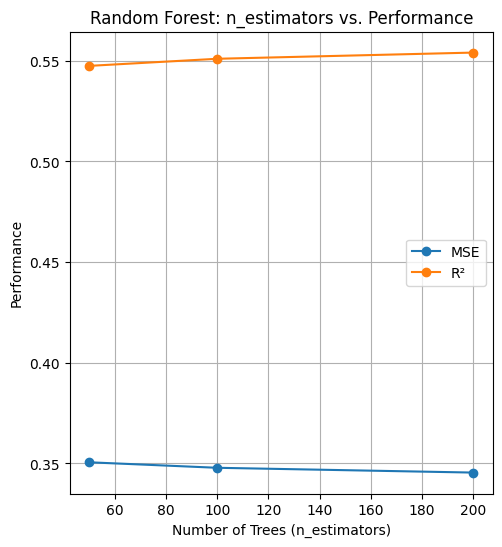

In [ ]:
# Plot Results
plt.figure(figsize=(12, 6))

# Initialize the 'n_estimators' key in rf_results
rf_results["n_estimators"] = {"values": [], "MSE": [], "R2": []}

# Experiment with n_estimators and store results
for n in [50, 100, 200]:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)

    rf_results["n_estimators"]["values"].append(n)
    rf_results["n_estimators"]["MSE"].append(mse)
    rf_results["n_estimators"]["R2"].append(r2)

    print(f"n_estimators {n} - MAE: {mean_absolute_error(y_test, y_pred_rf)}, R²: {r2}, MSE: {mse}")

# Plot Random Forest n_estimators
plt.subplot(1, 2, 1)
plt.plot(rf_results["n_estimators"]["values"], rf_results["n_estimators"]["MSE"], marker='o', label='MSE')
plt.plot(rf_results["n_estimators"]["values"], rf_results["n_estimators"]["R2"], marker='o', label='R²')
plt.title("Random Forest: n_estimators vs. Performance")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

# ... (rest of the plotting code) ...

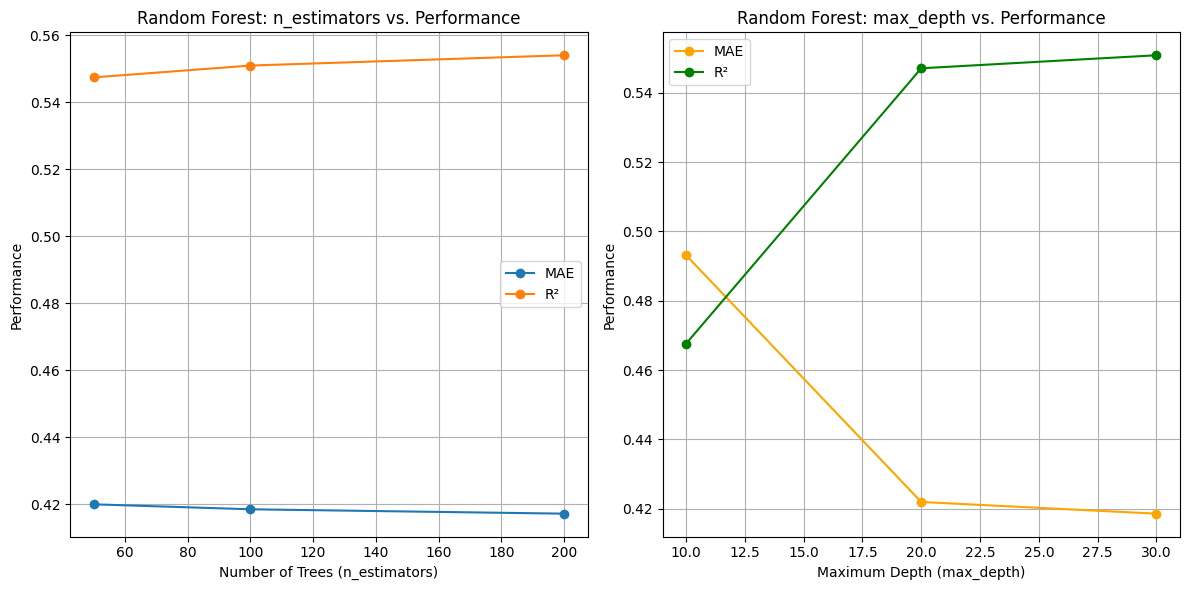

Linear Regression MAE: 0.5863, R²: 0.2653


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize results storage
rf_results = {
    "n_estimators": {"values": [], "MAE": [], "R2": []},
    "max_depth": {"values": [], "MAE": [], "R2": []}
}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Random Forest - Experiment with n_estimators
for n in [50, 100, 200]:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    rf_results["n_estimators"]["values"].append(n)
    rf_results["n_estimators"]["MAE"].append(mae)
    rf_results["n_estimators"]["R2"].append(r2)

# Random Forest - Experiment with max_depth
for depth in [10, 20, 30]:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    rf_results["max_depth"]["values"].append(depth)
    rf_results["max_depth"]["MAE"].append(mae)
    rf_results["max_depth"]["R2"].append(r2)

# Plot Results
plt.figure(figsize=(12, 6))

# Plot Random Forest n_estimators
plt.subplot(1, 2, 1)
plt.plot(rf_results["n_estimators"]["values"], rf_results["n_estimators"]["MAE"], marker='o', label='MAE')
plt.plot(rf_results["n_estimators"]["values"], rf_results["n_estimators"]["R2"], marker='o', label='R²')
plt.title("Random Forest: n_estimators vs. Performance")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

# Plot Random Forest max_depth
plt.subplot(1, 2, 2)
plt.plot(rf_results["max_depth"]["values"], rf_results["max_depth"]["MAE"], marker='o', label='MAE', color='orange')
plt.plot(rf_results["max_depth"]["values"], rf_results["max_depth"]["R2"], marker='o', label='R²', color='green')
plt.title("Random Forest: max_depth vs. Performance")
plt.xlabel("Maximum Depth (max_depth)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Linear Regression Results Output
print(f"Linear Regression MAE: {lr_mae:.4f}, R²: {lr_r2:.4f}")


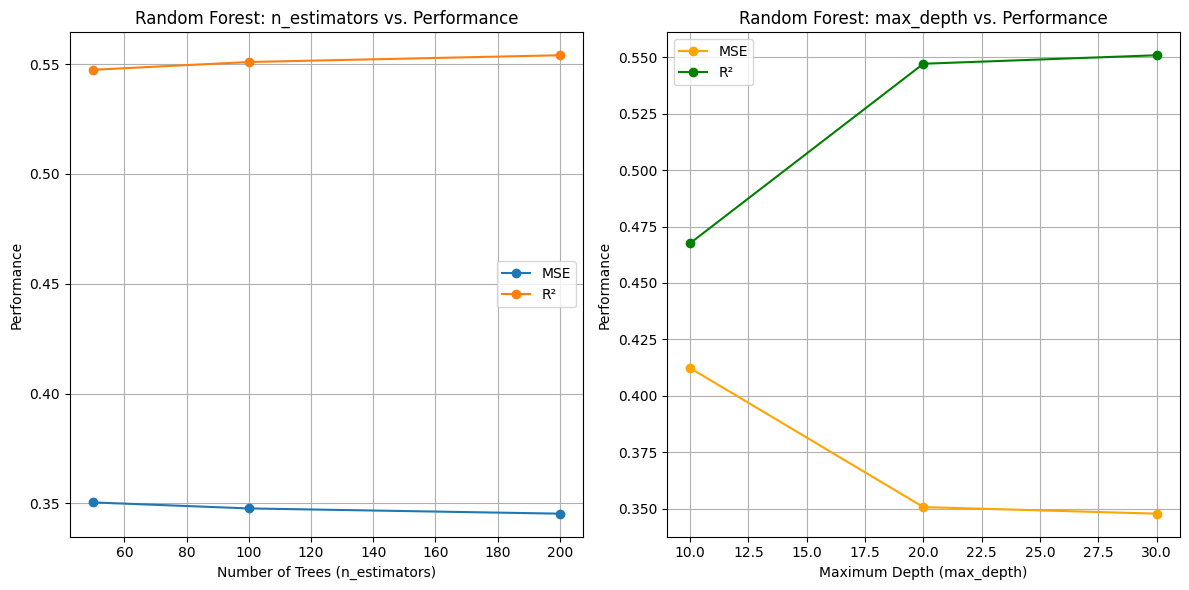

Linear Regression MSE: 0.5690, R²: 0.2653


In [ ]:
from sklearn.metrics import mean_squared_error

# Initialize results storage for Random Forest
rf_results_mse = {
    "n_estimators": {"values": [], "MSE": [], "R2": []},
    "max_depth": {"values": [], "MSE": [], "R2": []}
}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Random Forest - Experiment with n_estimators
for n in [50, 100, 200]:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    rf_results_mse["n_estimators"]["values"].append(n)
    rf_results_mse["n_estimators"]["MSE"].append(mse)
    rf_results_mse["n_estimators"]["R2"].append(r2)

# Random Forest - Experiment with max_depth
for depth in [10, 20, 30]:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    rf_results_mse["max_depth"]["values"].append(depth)
    rf_results_mse["max_depth"]["MSE"].append(mse)
    rf_results_mse["max_depth"]["R2"].append(r2)

# Plot Results
plt.figure(figsize=(12, 6))

# Plot Random Forest n_estimators
plt.subplot(1, 2, 1)
plt.plot(rf_results_mse["n_estimators"]["values"], rf_results_mse["n_estimators"]["MSE"], marker='o', label='MSE')
plt.plot(rf_results_mse["n_estimators"]["values"], rf_results_mse["n_estimators"]["R2"], marker='o', label='R²')
plt.title("Random Forest: n_estimators vs. Performance")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

# Plot Random Forest max_depth
plt.subplot(1, 2, 2)
plt.plot(rf_results_mse["max_depth"]["values"], rf_results_mse["max_depth"]["MSE"], marker='o', label='MSE', color='orange')
plt.plot(rf_results_mse["max_depth"]["values"], rf_results_mse["max_depth"]["R2"], marker='o', label='R²', color='green')
plt.title("Random Forest: max_depth vs. Performance")
plt.xlabel("Maximum Depth (max_depth)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Linear Regression Results Output
print(f"Linear Regression MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")


In [ ]:
# Replot the Random Forest results for MSE and R² for both n_estimators and max_depth

plt.figure(figsize=(12, 6))

# Plot Random Forest n_estimators
plt.subplot(1, 2, 1)
plt.plot(rf_results_mse["n_estimators"]["values"], rf_results_mse["n_estimators"]["MSE"], marker='o', label='MSE')
plt.plot(rf_results_mse["n_estimators"]["values"], rf_results_mse["n_estimators"]["R2"], marker='o', label='R²')
plt.title("Random Forest: n_estimators vs. Performance")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

# Plot Random Forest max_depth
plt.subplot(1, 2, 2)
plt.plot(rf_results_mse["max_depth"]["values"], rf_results_mse["max_depth"]["MSE"], marker='o', label='MSE', color='orange')
plt.plot(rf_results_mse["max_depth"]["values"], rf_results_mse["max_depth"]["R2"], marker='o', label='R²', color='green')
plt.title("Random Forest: max_depth vs. Performance")
plt.xlabel("Maximum Depth (max_depth)")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
correlation = data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


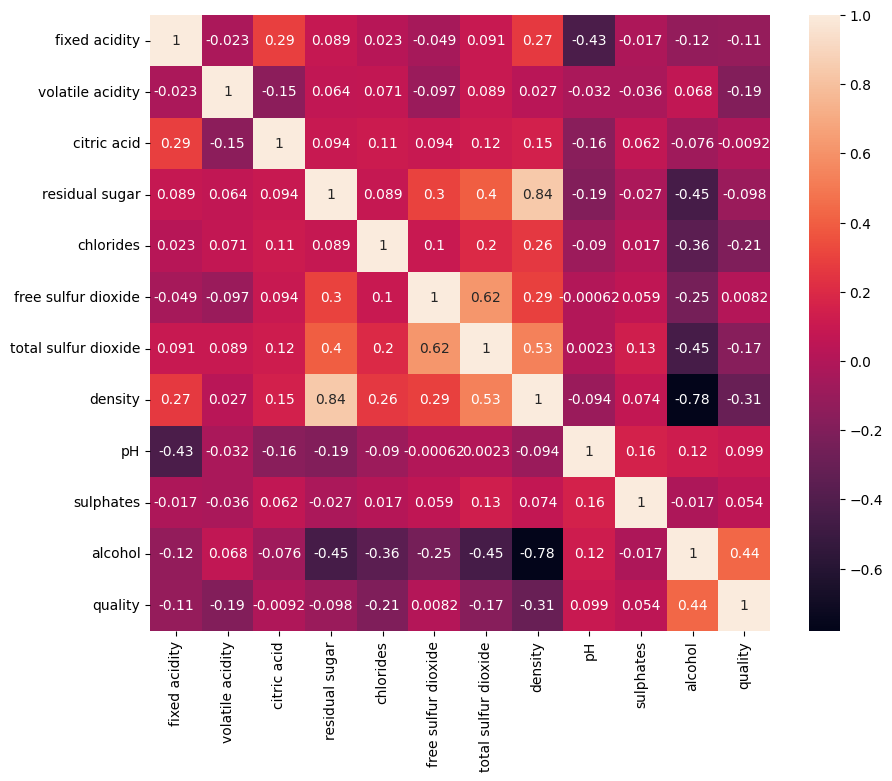

In [ ]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

Mean Squared Error (MSE): 0.6177518759055035
R-squared (R²): 0.20235854926883212


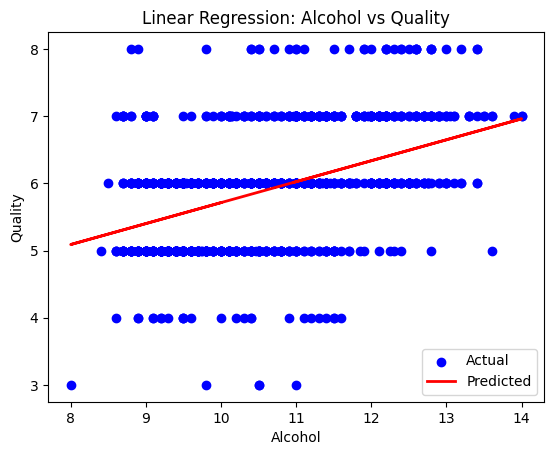

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Feature and target
X = data[['alcohol']]  # Use alcohol as the single feature
Y = data['quality']    # Target variable

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Predictions
Y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualization
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Linear Regression: Alcohol vs Quality')
plt.legend()
plt.show()


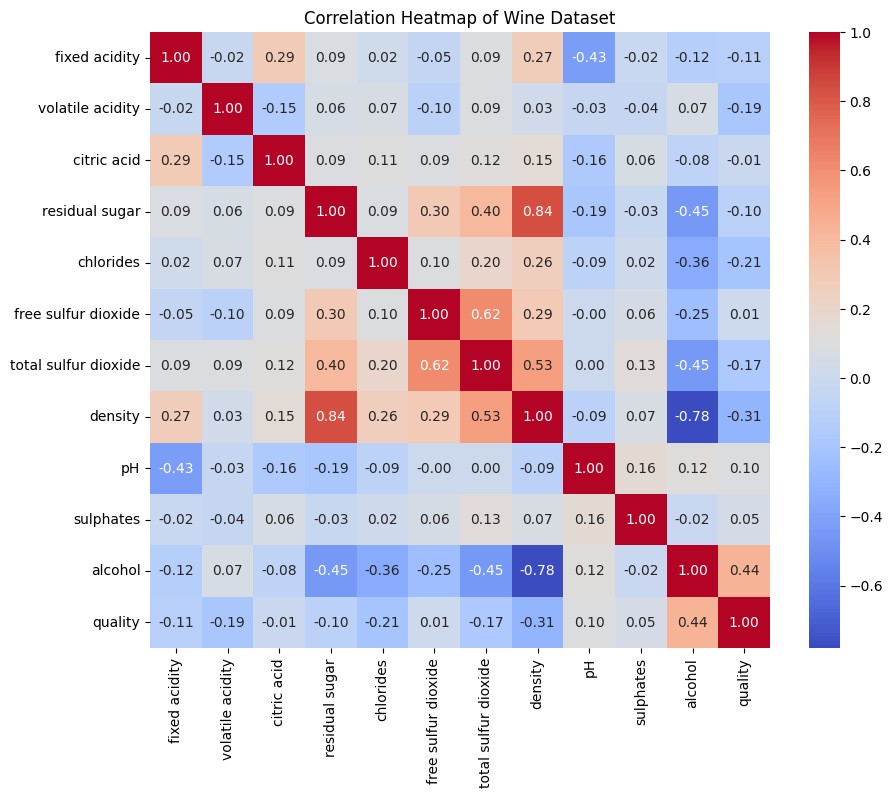

Strongly correlated features with quality:
 Index(['chlorides', 'density', 'alcohol', 'quality'], dtype='object')


(0.6115127420865862, 0.21041452116423487)

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Correlation heatmap to identify strongly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()

# Selecting features strongly correlated with 'quality'
strong_corr_features = data.corr()['quality'][abs(data.corr()['quality']) > 0.2].index
print("Strongly correlated features with quality:\n", strong_corr_features)

# Creating a dataset with selected features
selected_data = data[strong_corr_features]

# Splitting the data into training and testing sets
X = selected_data.drop(columns='quality')
y = selected_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


In [ ]:
# Dropping low-correlation features: 'free sulfur dioxide' and 'citric acid'
# Check if the columns exist before dropping
features_to_drop = ['free sulfur dioxide', 'citric acid']
existing_columns = data.columns
features_to_drop = [col for col in features_to_drop if col in existing_columns]  # Filter out non-existing columns
# Only drop columns that exist
if features_to_drop:
    data = data.drop(columns=features_to_drop)
else:
    print("Columns to drop not found in DataFrame. Skipping drop operation.")  # Inform the user if no columns to drop

# Continue with the rest of your code...

Columns to drop not found in DataFrame. Skipping drop operation.


In [ ]:

# Separating the features (X) and the target variable (y)
X = data.drop(columns='quality')
y = data['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model on the selected features
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.5619734349618435, 0.2743796928527482)

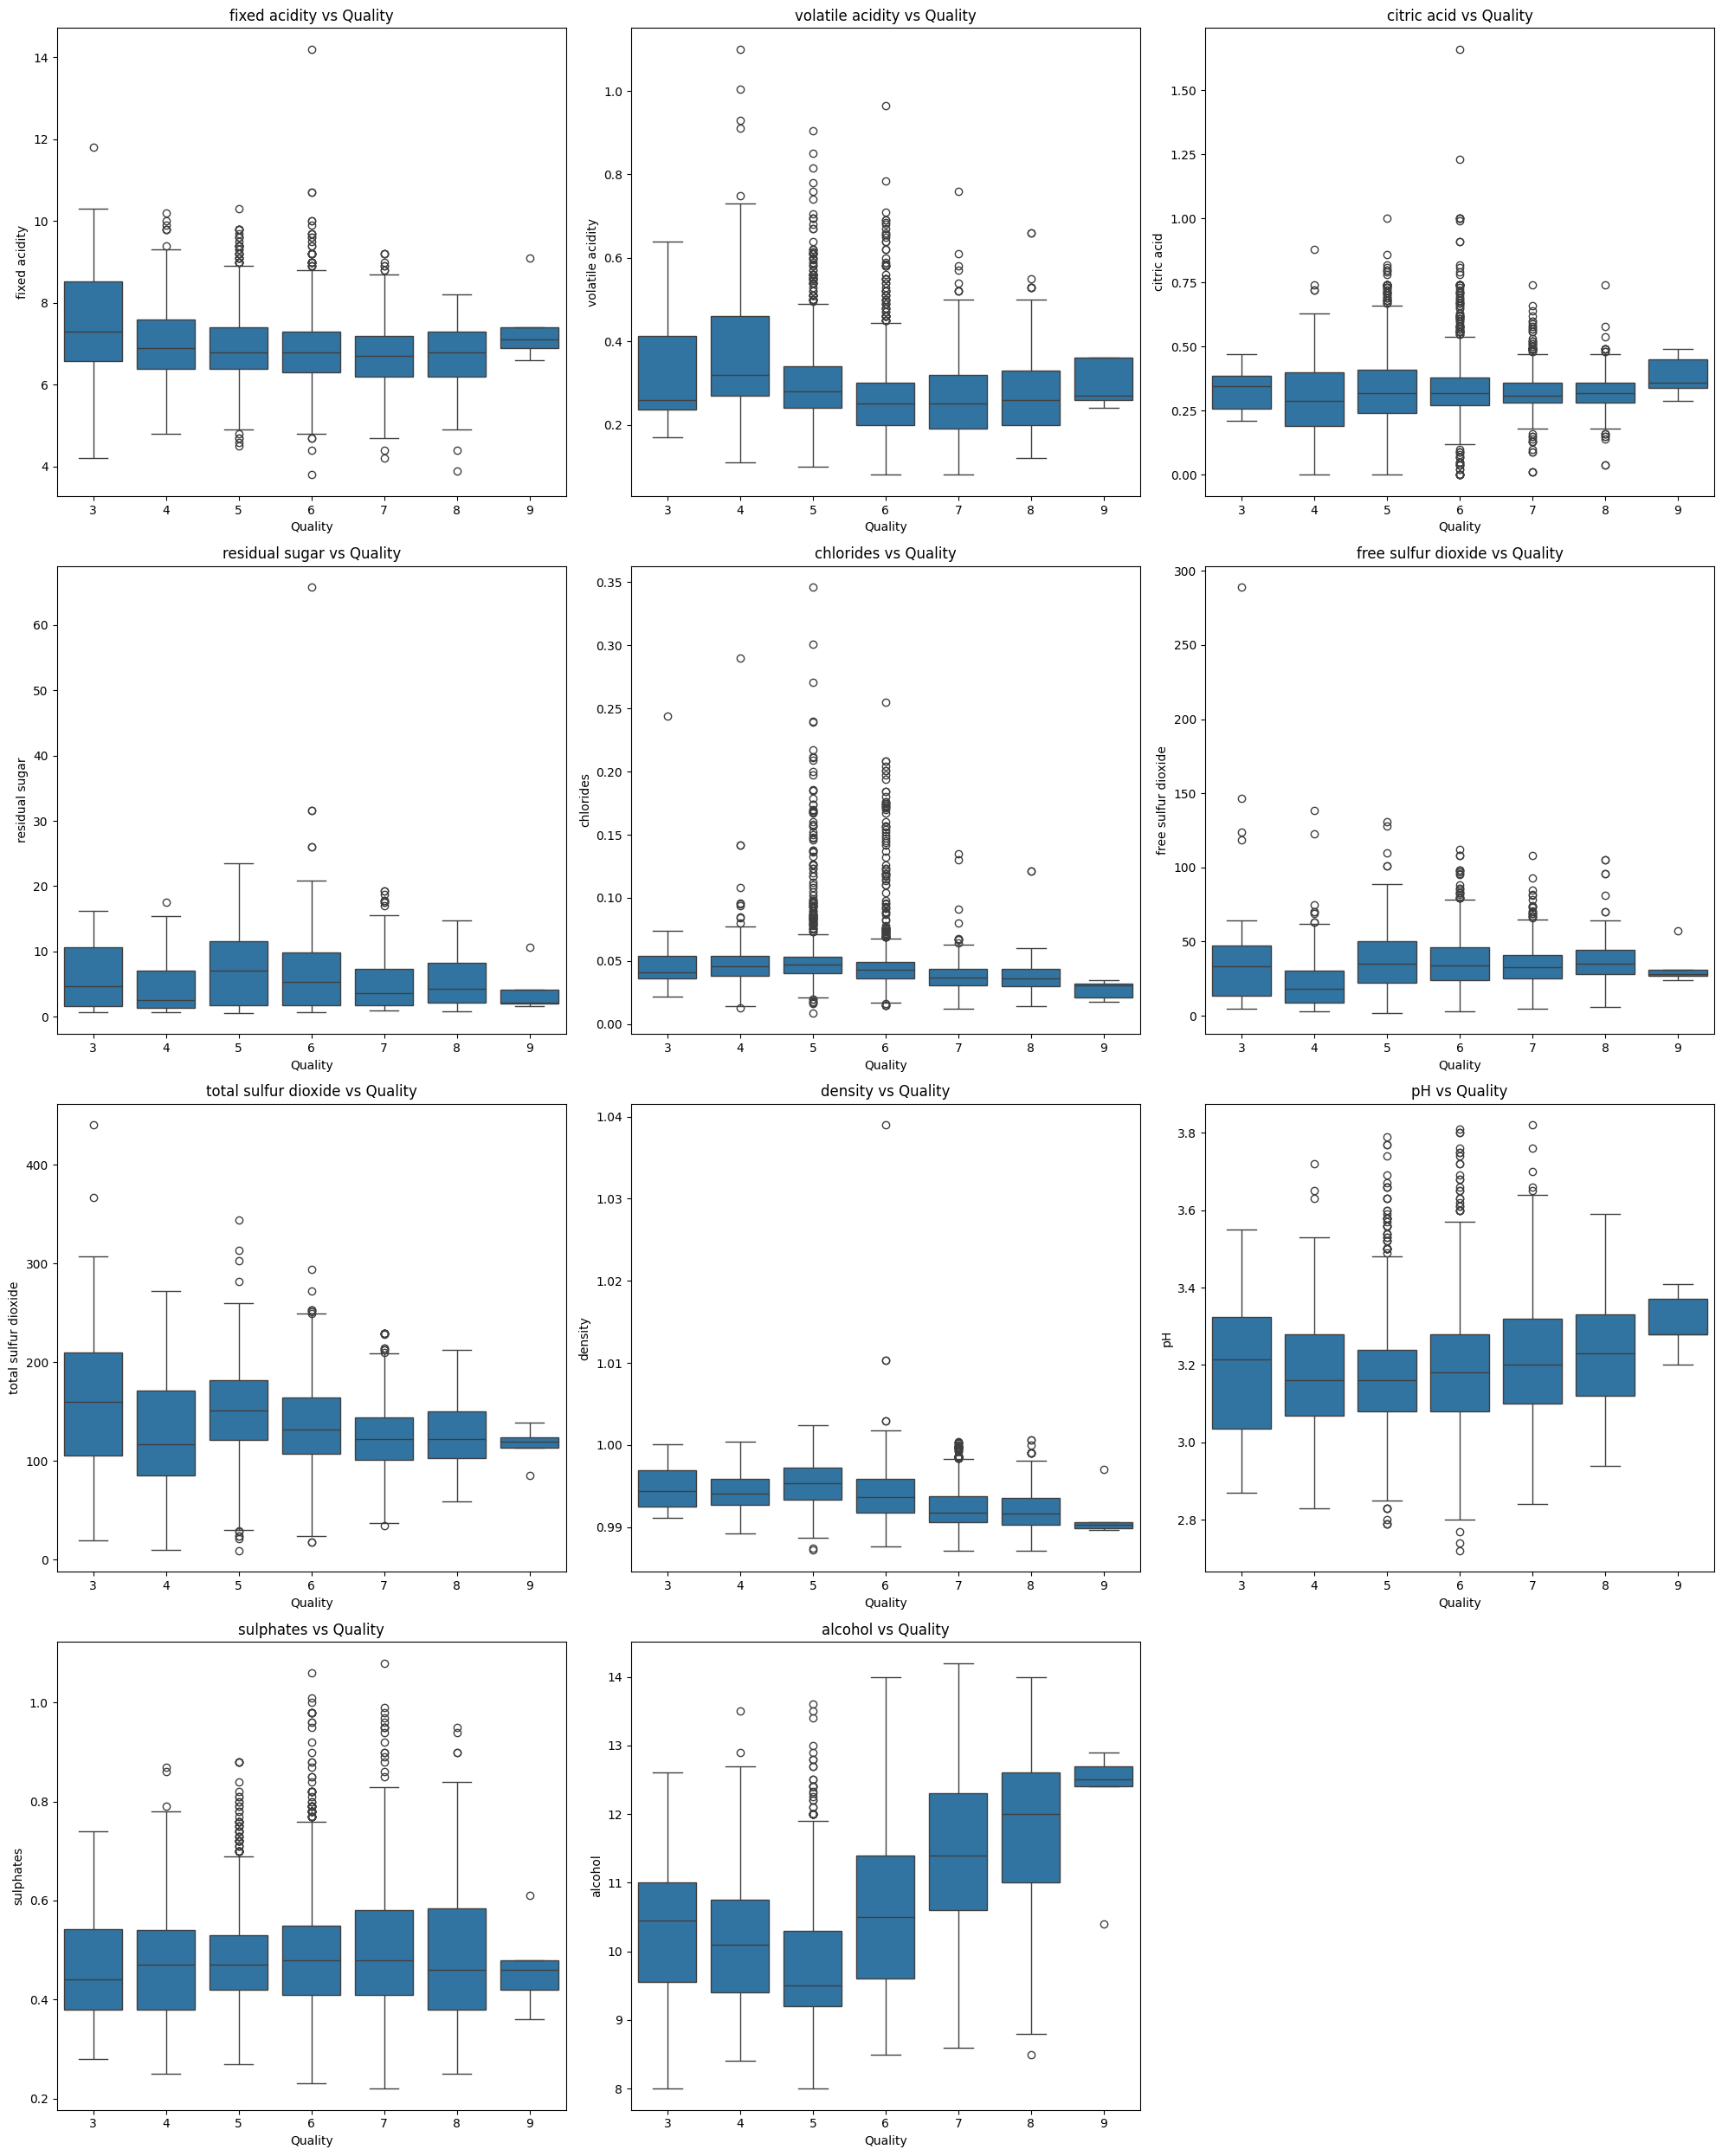

In [ ]:
# Box plots for other features against quality
features = ['fixed acidity', 'volatile acidity', 'citric acid',
            'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Set up the figure for multiple plots
plt.figure(figsize=(20, 25))

# Loop through features and create a box plot for each
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data['quality'], y=data[feature])
    plt.title(f'{feature} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)

# Show all plots
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Features and target selection
selected_features = ['alcohol', 'chlorides', 'volatile acidity', 'sulphates']
X = data[selected_features]
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Multi Linear Regression -----
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluation for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")


Linear Regression Results:
Mean Squared Error: 0.5869798491315757
R-squared: 0.24209140162466813


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Features and target selection
selected_features = ['alcohol', 'chlorides', 'volatile acidity', 'sulphates']
X = data[selected_features]
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- SVR Regression-----
# Train the SVR Regression model
regressor = SVR(kernel='linear', C=0.1)
regressor.fit(X_train, y_train)

# Predictions
y_pred_linear = SVR_model.predict(X_test)

# Evaluation for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("SVR Regression Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")


NameError: name 'SVR_model' is not defined

In [ ]:
# Use all features
X_all = data.drop('quality', axis=1)  # Exclude the target variable 'quality'
y_all = data['quality']

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Train the Random Forest model with all features
random_forest_all_features = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_all_features.fit(X_train_all, y_train_all)

# Predictions
y_pred_all = random_forest_all_features.predict(X_test_all)

# Evaluation
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)
print("Random Forest with All Features:")
print(f"Mean Squared Error: {mse_all}")
print(f"R-squared: {r2_all}")

# Feature Importance Visualization
all_feature_importances = random_forest_all_features.feature_importances_
plt.barh(X_all.columns, all_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (All Features)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example values for demonstration purposes
models = ['Linear Regression', 'Random Forest']
mse_values = [0.45, 0.32]  # Replace with actual MSE from your models
r2_values = [0.55, 0.78]   # Replace with actual R² from your models

# MSE Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['skyblue', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) + 0.1)

# R² Plot
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['skyblue', 'orange'])
plt.title('R-squared (R²)')
plt.ylabel('R²')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [ ]:
# Example visualization of feature importance
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                'density', 'pH', 'sulphates', 'alcohol']

# Replace this array with the actual feature importances from your Random Forest model
importances = [0.05, 0.15, 0.02, 0.06, 0.08, 0.04, 0.03, 0.07, 0.05, 0.09, 0.36]

plt.figure(figsize=(10, 6))
plt.barh(all_features, importances, color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (All Features)')
plt.show()
